# TITANIC

In [1]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/titanic.png" width="800">

In [2]:
path ='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'

In [3]:

df = pd.read_csv(path, sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [4]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.0,1,0,66.6000,S
152,0,3,male,55.5,0,0,8.0500,S
153,0,3,male,40.5,0,2,14.5000,S
154,0,3,male,NaN,0,0,7.3125,S


In [5]:
#controllo non null e object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.9+ KB


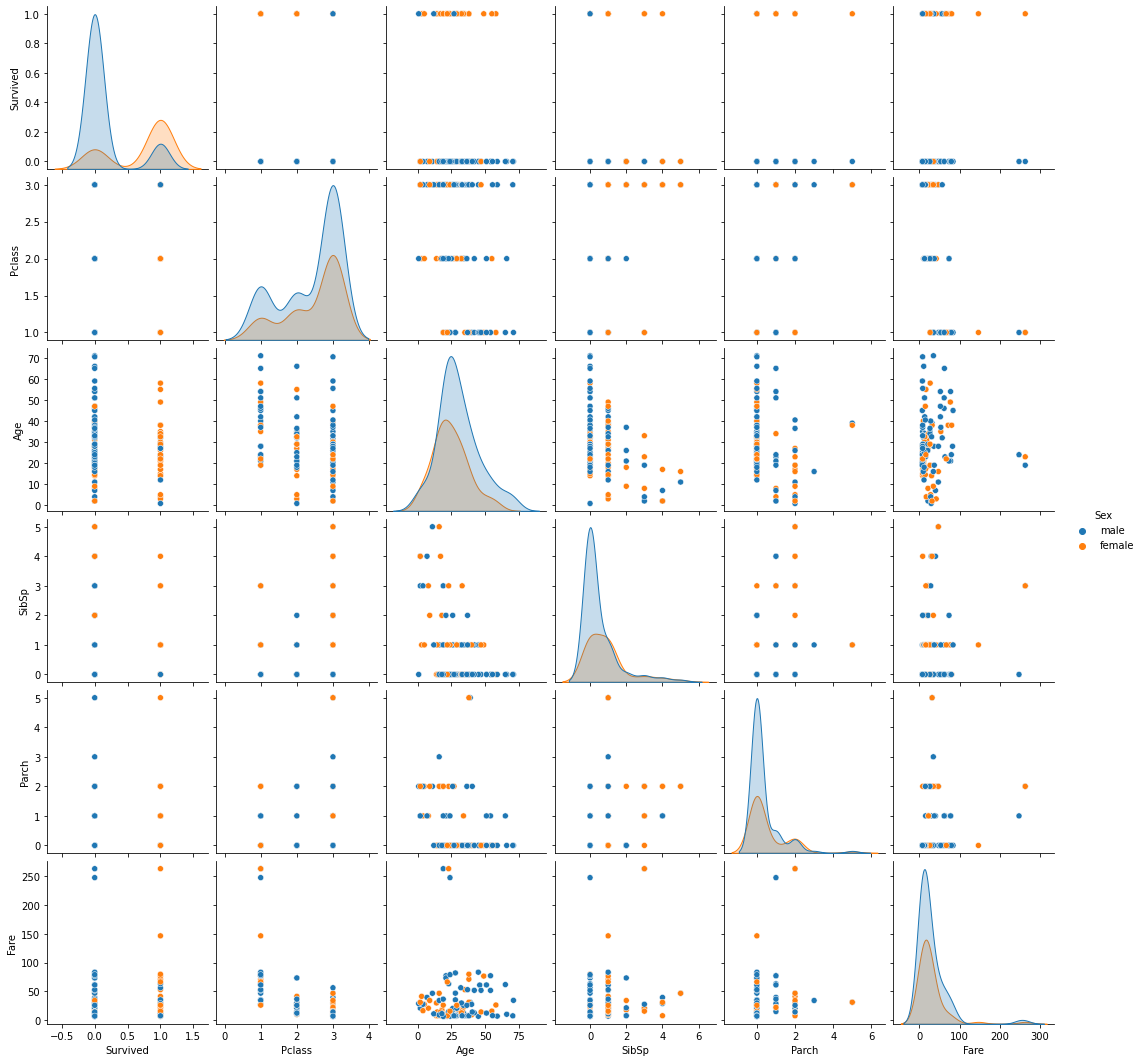

In [6]:
sns.pairplot(df,hue='Sex')

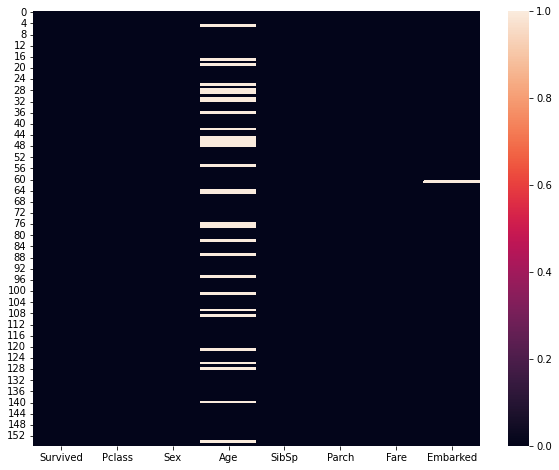

In [ ]:
#nella colonna Age ci mancano parecchi dati
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/holes.jpg" width="900">

Interpolate for missing values

This means you can deduce the missing values by interpolating  existing values.

For example, if we have the series 1, 3, 4, ?, 6, 8,….What is the missing value

Simply put, it is midpoint between 4 and 6. So the result it (4+6)/2 = 5

To interpolate missing values for Age, use the code below

In [8]:
# To replace missing values with interpolated values, for example Age  ,valore prima , valore dopo , diciso 2
df['Age'] = df['Age'].interpolate()

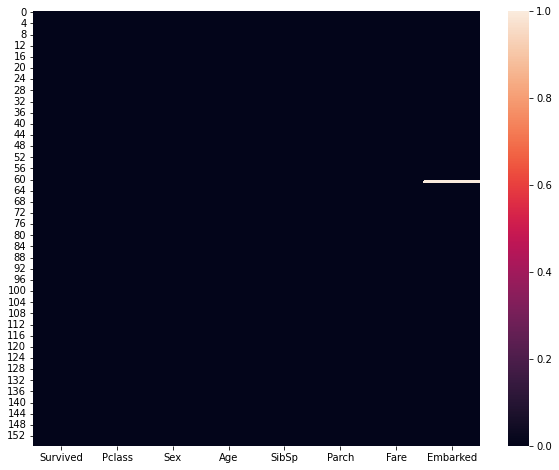

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

In [11]:
# Drop all rows with missin data
#df['Embarked'].mode())#incserire la Moda
df = df.dropna()

### Convert categorical values to numeric

Now if you view the dataset properties using df.info(), you will see that the Sex and Embarked columns are not numeric. We we now convert them to numeric. There is a separate tutorial on Converting categorical column to numeric here.

This takes three steps:

First create dummy variables from the categorical columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  155 non-null    int64  
 1   Pclass    155 non-null    int64  
 2   Sex       155 non-null    object 
 3   Age       155 non-null    float64
 4   SibSp     155 non-null    int64  
 5   Parch     155 non-null    int64  
 6   Fare      155 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 10.9+ KB


In [ ]:
## 
#df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

## Dummies

In [12]:
# First, create dummy series from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

Note: the get_dummies() functions converts categorical variables into dummy indicator variables

Second, we add these dummy columns to the original dataset

In [13]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1).drop(['Sex','Embarked'],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.00,1,0,7.2500,0,0,1,0,1
1,1,1,38.00,1,0,71.2833,1,0,0,1,0
2,1,3,26.00,0,0,7.9250,0,0,1,1,0
3,1,1,35.00,1,0,53.1000,0,0,1,1,0
4,0,3,35.00,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
151,1,1,22.00,1,0,66.6000,0,0,1,1,0
152,0,3,55.50,0,0,8.0500,0,0,1,0,1
153,0,3,40.50,0,2,14.5000,0,0,1,0,1
154,0,3,45.75,0,0,7.3125,0,0,1,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  155 non-null    int64  
 1   Pclass    155 non-null    int64  
 2   Age       155 non-null    float64
 3   SibSp     155 non-null    int64  
 4   Parch     155 non-null    int64  
 5   Fare      155 non-null    float64
 6   C         155 non-null    uint8  
 7   Q         155 non-null    uint8  
 8   S         155 non-null    uint8  
 9   female    155 non-null    uint8  
 10  male      155 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 9.2 KB


### Separate the Features and the Classes

We would separate the features (X) and the classes (y). The classes is the target variable we want to predict. In this case, it is the ‘Survived’ column

In [15]:
## Move target variable to the end of the dataframe
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'female', 'male'],
      dtype='object')

In [42]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'female', 'male','Survived']]

In [43]:
X_ = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_ #X_ =dati grezzi 

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.00,1,0,7.2500,0,0,1,0,1
1,1,38.00,1,0,71.2833,1,0,0,1,0
2,3,26.00,0,0,7.9250,0,0,1,1,0
3,1,35.00,1,0,53.1000,0,0,1,1,0
4,3,35.00,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
151,1,22.00,1,0,66.6000,0,0,1,1,0
152,3,55.50,0,0,8.0500,0,0,1,0,1
153,3,40.50,0,2,14.5000,0,0,1,0,1
154,3,45.75,0,0,7.3125,0,0,1,0,1


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [45]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [ ]:
X_test.shape

(47, 10)

## Build Decision Trees Classifier

In [46]:
# Using simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7446808510638298

## Build Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7659574468085106

Perform Classification Using Gradient Boosting Classifier

This classifier is available in the ensemble module which we already imported. So we don’t need to import anything

## Build Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

## Build Logistic Regression Classifier

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.723404255319149

## Build Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.6170212765957447

## Build K-Nearest Neighbor Classifier

In [51]:
## Build a K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)


0.7659574468085106

## Build Support Vector Machine Classifier

In [52]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.723404255319149

## Build XGB Classifier

In [53]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.7446808510638298

## Make All ConfusionMatrix

In [54]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

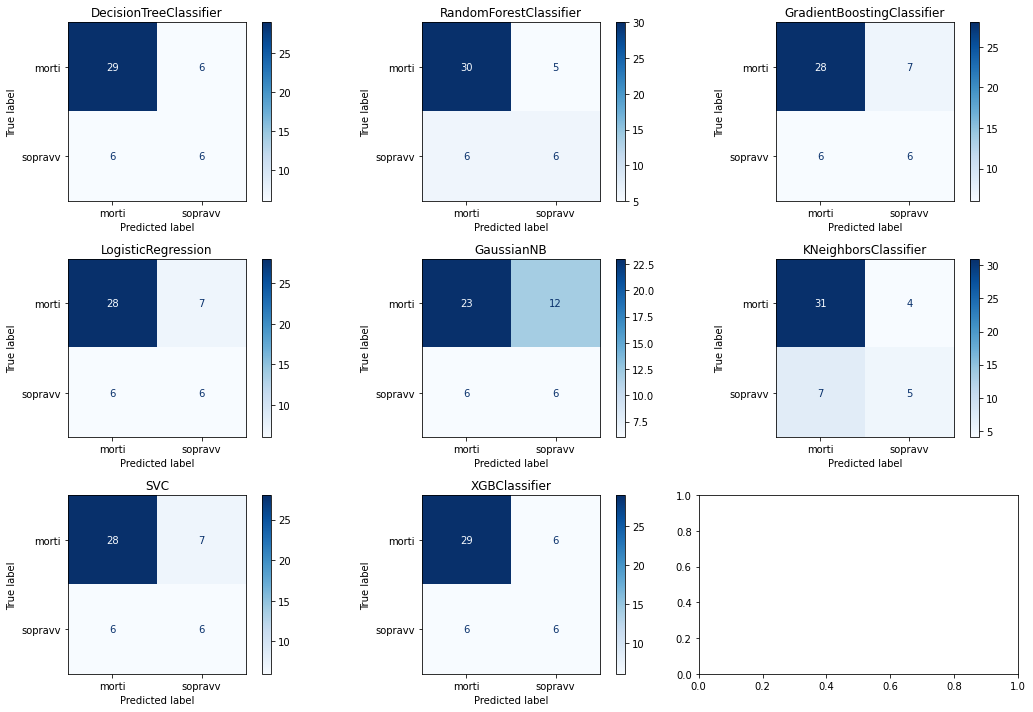

In [56]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['morti','sopravv'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [57]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.50      0.50      0.50        12

    accuracy                           0.74        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.74      0.74      0.74        47

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.55      0.50      0.52        12

    accuracy                           0.77        47
   macro avg       0.69      0.68      0.68        47
weighted avg       0.76      0.77      0.76        47

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.46      0.50      0.48        12

    accuracy                           0.72        47
   macro avg       0.6

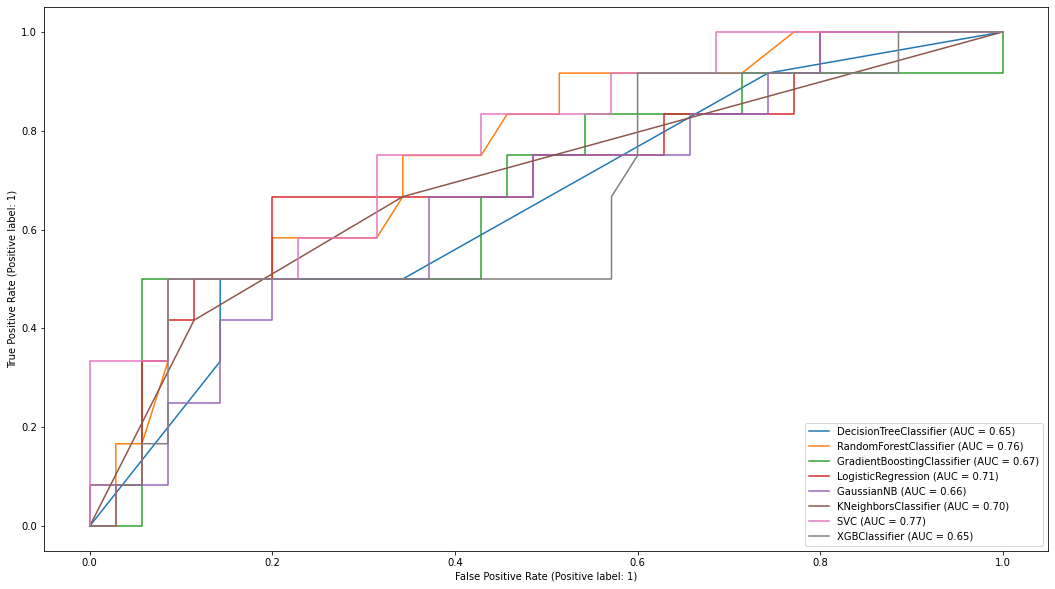

In [58]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

## Cross Validation



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png" width="800">

#All in one shot with CrossVal

In [59]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    #models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table.T)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.811667,0.766429,0.676667,0.705303
Support Vector Classifier,0.798750,0.741905,0.676667,0.692576
Decision Tree,0.715417,0.615278,0.600000,0.590541
Random Forest,0.792917,0.785000,0.603333,0.668939
Gaussian Naive Bayes,0.735000,0.630000,0.680000,0.635175


In [60]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.723, F1: 0.646
feature selected 3, Acc.Test: 0.723, F1: 0.646
feature selected 4, Acc.Test: 0.723, F1: 0.646
feature selected 5, Acc.Test: 0.723, F1: 0.646
feature selected 6, Acc.Test: 0.723, F1: 0.646
feature selected 7, Acc.Test: 0.723, F1: 0.646
feature selected 8, Acc.Test: 0.723, F1: 0.646
feature selected 9, Acc.Test: 0.723, F1: 0.646

 Best number of feature selection is: 2


## Final Pipeline

In [61]:
classifier = LogisticRegression(max_iter=10000)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                #('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [62]:
input_data = [3,22,1,0,7.25,0,0,1,0,1]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==0):
  print('Died')
else:
  print('Survived')

0
Died


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
